## IMPORTING LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import r2_score

## IMPORTING DATASETS

In [29]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\energy_consuption_data.csv")
print(data)

    Building Type  Square Footage  Number of Occupants  Appliances Used  \
0     Residential            7063                   76               10   
1      Commercial           44372                   66               45   
2      Industrial           19255                   37               17   
3     Residential           13265                   14               41   
4      Commercial           13375                   26               18   
..            ...             ...                  ...              ...   
995   Residential           14419                   68               44   
996    Industrial           12194                    7               22   
997    Commercial           39562                   88               20   
998   Residential            8348                   67               37   
999    Commercial           15813                   57               11   

     Average Temperature Day of Week  Energy Consumption  
0                  29.84     Weekday    

## BASIC INFORMATIONS

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


## DATA CLEANING

### EMPTY CELLS

In [31]:
data.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [32]:
data.columns = [col.replace(' ', '_') for col in data.columns]

### CHECKING DUPLICATES

In [33]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


In [34]:
print(data.describe())

       Square_Footage  Number_of_Occupants  Appliances_Used  \
count        1000.000          1000.000000      1000.000000   
mean        25462.388            48.372000        25.606000   
std         14294.554            29.061972        14.105166   
min           560.000             1.000000         1.000000   
25%         13169.750            22.000000        13.000000   
50%         25477.000            47.000000        26.000000   
75%         37446.250            73.250000        38.000000   
max         49997.000            99.000000        49.000000   

       Average_Temperature  Energy_Consumption  
count          1000.000000         1000.000000  
mean             22.611390         4166.252570  
std               7.139943          933.313064  
min              10.050000         1683.950000  
25%              16.475000         3509.482500  
50%              22.815000         4175.730000  
75%              28.850000         4863.850000  
max              34.990000         6530.

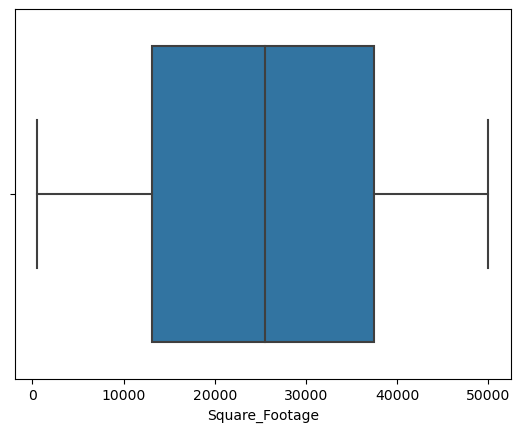

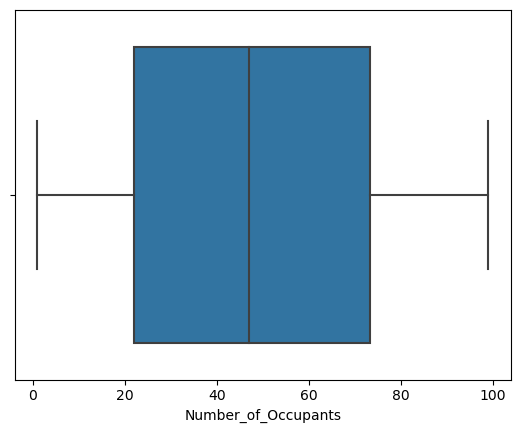

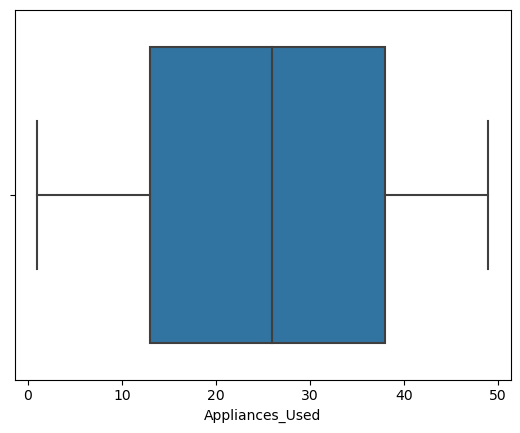

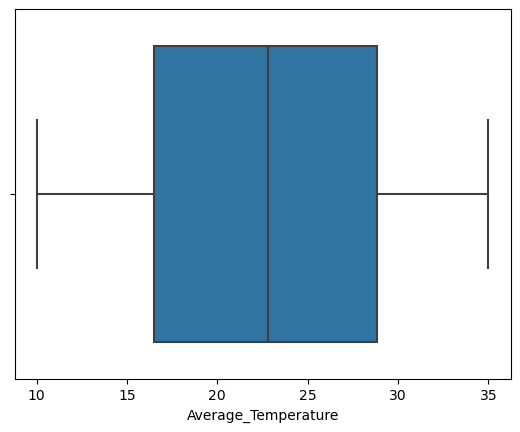

In [35]:

sns.boxplot(data=data, x='Square_Footage')
plt.show()
sns.boxplot(data=data, x='Number_of_Occupants')
plt.show()
sns.boxplot(data=data, x='Appliances_Used')
plt.show()
sns.boxplot(data=data, x='Average_Temperature')
plt.show()

In [36]:
#Define features (X) and target (y)
X = data[['Building_Type', 'Square_Footage', 'Number_of_Occupants', 'Appliances_Used', 'Average_Temperature', 'Day_of_Week']]
y = data['Energy_Consumption']

C:\Users\Dell\AppData\Local\Temp\ipykernel_18212\3955795510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


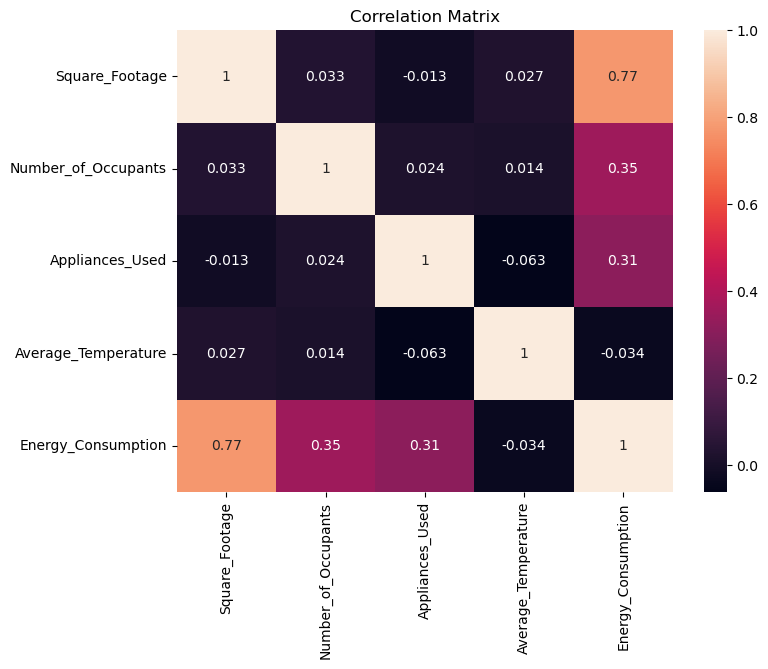

In [37]:
# Correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

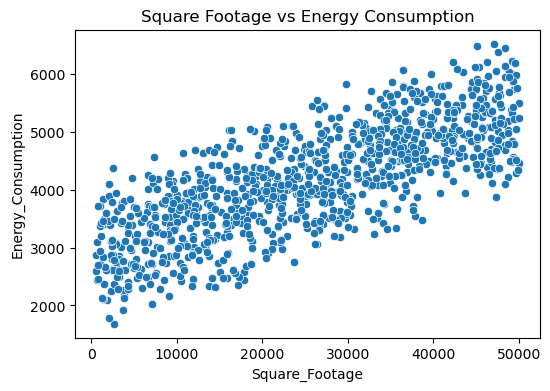

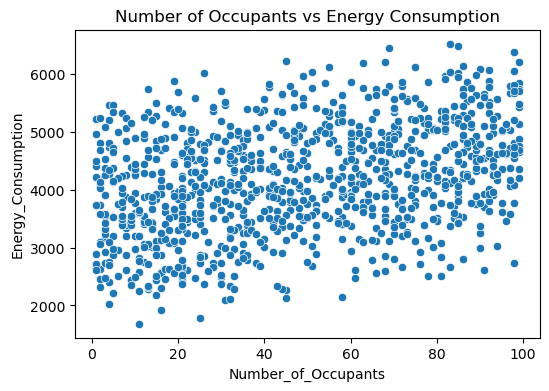

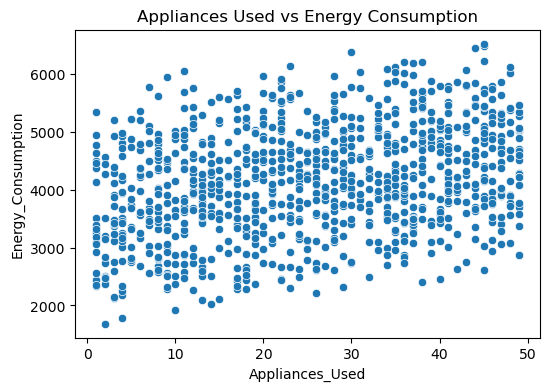

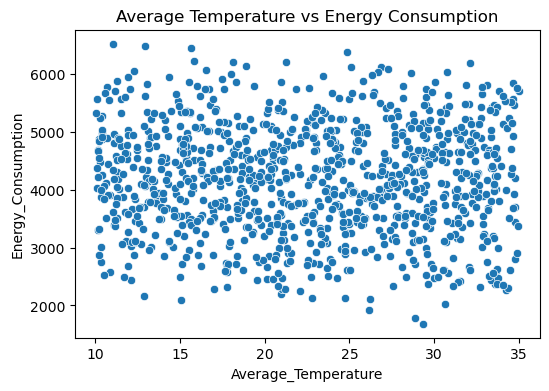

In [38]:
# Scatter plots
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Square_Footage', y='Energy_Consumption', data=data)
plt.title('Square Footage vs Energy Consumption')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Number_of_Occupants', y='Energy_Consumption', data=data)
plt.title('Number of Occupants vs Energy Consumption')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Appliances_Used', y='Energy_Consumption', data=data)
plt.title('Appliances Used vs Energy Consumption')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Average_Temperature', y='Energy_Consumption', data=data)
plt.title('Average Temperature vs Energy Consumption')
plt.show()

## ENCODING CATEGORICAL DATA

In [39]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Building_Type', 'Day_of_Week'])


In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Make predictions on testing set
y_pred = model.predict(X_test)

In [44]:
df=pd.DataFrame({
    "Predicted Values":y_pred,
    "Actual Values":y_test
})

print(df.head(15).to_string())

     Predicted Values  Actual Values
521       4549.598244        4549.59
737       2842.901083        2842.91
740       5781.847788        5781.83
660       4773.550577        4773.54
411       3791.050217        3791.04
678       2470.599330        2470.59
626       5003.049430        5003.05
513       3314.099859        3314.12
859       5147.100047        5147.11
136       4298.899998        4298.92
811       2998.549367        2998.57
76        3915.701312        3915.71
636       5329.298071        5329.29
973       4628.799347        4628.80
938       4682.449915        4682.44


In [43]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'R2 score percentage: {r2*100:.2f}%')


Mean Absolute Error: 0.01
R-squared: 1.00
R2 score percentage: 100.00%
